# Assignment Two
## Task B: NAND-operator

In [38]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [26]:
class Model:
    def __init__(self):
        self.W = torch.tensor([[0.00], [0.00]], requires_grad=True)
        self.b = torch.tensor([[1.00]], requires_grad=True)
        
    def logits(self, x):
        return x @ self.W + self.b
    
    def F(self, x):
        return torch.sigmoid(self.logits(x))
    
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [27]:
model = Model()

### x_train and y_train based on the NAND-operator

In [28]:
x_train = torch.tensor([[0., 0.], [1., 1], [1., 0.], [0., 1.]])
y_train = torch.tensor([[1.], [0.], [1.], [1.]])

optimizer = torch.optim.SGD([model.W, model.b], lr=0.1)

### Training and loss output

In [29]:
for epoch in range(1000):
        model.loss(x_train, y_train).backward()
        optimizer.step()
        optimizer.zero_grad()

print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[-3.1068],
        [-3.1068]], requires_grad=True), b = tensor([[4.8753]], requires_grad=True), loss = tensor(0.1389, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


### Plotting

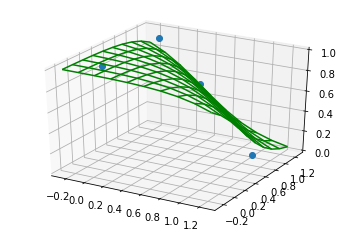

In [37]:
fig = plt.figure()
plot1 = fig.add_subplot(111, projection='3d')
    
plot1.plot(x_train[:, 0].squeeze(),
           x_train[:, 1].squeeze(),
           y_train[:, 0].squeeze(),
           'o')

x1_grid, x2_grid = torch.tensor(np.meshgrid(np.linspace(-0.25, 1.25, 10),
                                            np.linspace(-0.25, 1.25, 10)), dtype=torch.float)
y_grid = torch.tensor(np.empty([10, 10]), dtype=torch.float)
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        y_grid[i, j] = model.F(torch.tensor([[x1_grid[i, j], x2_grid[i, j]]])).detach()
        
plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

plt.show()

#### Graph visualizes the NAND-operator
#### All values expect x1, x2 = 1 gives y = 1
#### x1, x2 = 1 gives y = 0